In [149]:
import pandas as pd
import itertools
from scipy import stats
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def get_fld(str):
    try:
        return int(re.findall(r'\d+', str)[1])
    except TypeError:
        print("Field was not a string")

In [5]:
def get_tidy_p1(patient):
    route = "../patient_microscopy_data/{pat}_5_S6P{p}.xls".format(pat = patient, p = '1')
    p1 = pd.read_excel(route, header = 1)
    p1 = p1.rename(mapper={'Unnamed: 0':'Condition', 'Unnamed: 1':'Patient', ' ':'Row', ' .1':'Col'}, axis = 1)
    p1['Section'] = p1['Section'].apply(get_fld)
    p1.drop(axis = 1,labels = ['TMRE POS X','TMRE POS Y', 'TMRE FORM FACTOR', 'MITO POS X','MITO POS Y', 'MITOTRACKER FORM FACTOR',
                   'NUC CG X', 'NUC CG Y', 'NUC FORM FACTOR'])
    return(p1)

In [6]:
def get_tidy_p2(patient):
    route = "../patient_microscopy_data/{pat}_5_S6P{p}.xls".format(pat = patient, p = '2')
    p2 = pd.read_excel(route, header = 1)
    p2 = p2.rename(mapper={'Unnamed: 0':'Condition', 'Unnamed: 1':'Patient', ' ':'Row', ' .1':'Col'}, axis = 1)
    p2['Section'] = p2['Section'].apply(get_fld)
    return(p2)

In [171]:
p1 = get_tidy_p1("FA0883")

In [173]:
[s for s in list(p1)
                       if " POS " in s]

['TMRE POS X', 'TMRE POS Y', 'MITO POS Y', 'MITO POS X']

In [163]:
p1["log_tmre_intensity"] = p1["TMRE INTENSITY"].apply(np.log)

In [164]:
p1["bc_tmre_intensity"] = stats.boxcox(p1["TMRE INTENSITY"])[0]

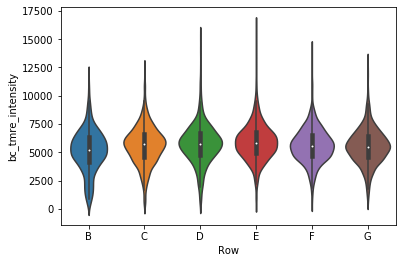

In [165]:
sns.violinplot(x="Row", y="bc_tmre_intensity", data=p1)

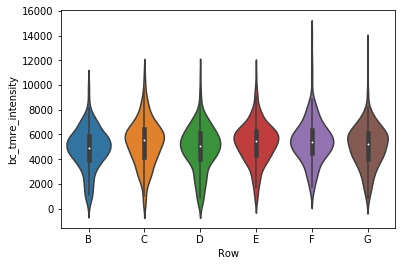

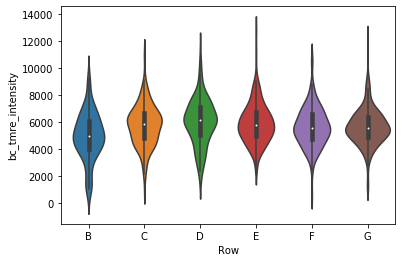

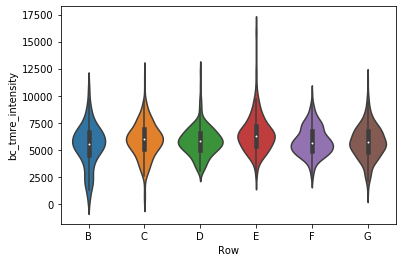

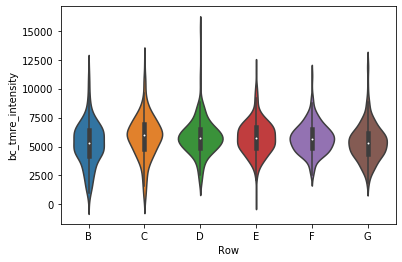

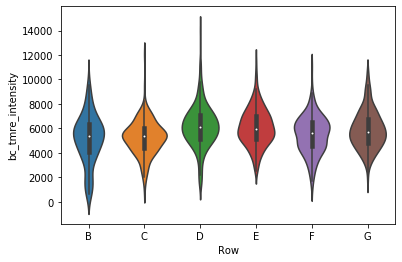

In [166]:
for col in p1.Col.unique():
    plt.figure()
    sns.violinplot(x="Row", y="bc_tmre_intensity", data=p1.loc[p1["Col"] == col])



In [160]:
pairs = list(itertools.combinations(p1.Row.unique(), 2))

In [169]:
bonf_p_val = 0.05 / len(pairs)
for pair in pairs:
    a = p1.loc[p1["Row"] == pair[0]].loc[p1["Col"] == 2]["bc_tmre_intensity"]
    b = p1.loc[p1["Row"] == pair[1]].loc[p1["Col"] == 2]["bc_tmre_intensity"]
    if stats.ks_2samp(a,b)[1] <= bonf_p_val:
        print(str(pair))

('B', 'C')


In [137]:
bonf_p_val = 0.05 / len(p1.Row.unique())
for row in p1.Row.unique():
    a = p1.loc[p1["Row"] == row].loc[p1["Col"] == 3]["bc_tmre_intensity"]
    b = p1.loc[p1["Col"] == 3]["bc_tmre_intensity"]
    if stats.ks_2samp(a,b)[1] <= bonf_p_val:
        print(str(row))

B


In [168]:
bonf_p_val = 0.05 / len(pairs)
for pair in pairs:
    a = p1.loc[p1["Row"] == pair[0]].loc[p1["Col"] == 5]["bc_tmre_intensity"]
    b = p1.loc[p1["Row"] == pair[1]].loc[p1["Col"] == 5]["bc_tmre_intensity"]
    if stats.ks_2samp(a,b)[1] <= bonf_p_val:
        print(str(pair))

ValueError: Data passed to ks_2samp must not be empty

In [170]:
bonf_p_val = 0.05 / len(p1.Row.unique())*len(p1.Col.unique())
for col in p1.Col.unique():
    for row in p1.Row.unique():
        a = p1.loc[p1["Row"] == row].loc[p1["Col"] == col]["log_tmre_intensity"]
        b = p1["log_tmre_intensity"]
        if stats.ks_2samp(a,b)[1] <= bonf_p_val:
            print(str([row,col]))

['B', 2]
['C', 2]
['D', 2]
['G', 2]
['B', 4]
['D', 4]
['C', 6]
['D', 6]
['E', 6]
['F', 6]
['B', 8]
['C', 8]
['D', 8]
['G', 8]
['B', 10]
['C', 10]
['D', 10]
['E', 10]


30